# Leo Chapter 4.5 ~ 4.8

### 2015 / 5 / 12 (火) 

## 中西 均

## 4.5.1 測定データからの平均値と誤差
単純なものの長さの測定データから、その平均値(の推定値)と誤差(平均値の分散)を表示することを考える。

In [2]:
%matplotlib inline
import numpy as np
import math
import pandas as pd
import pylab as pl

In [3]:
datum = np.array([17.62, 17.62, 17.615, 17.62, 17.61,
                                 17.61, 17.62, 17.625, 17.62, 17.62,
                                  17.61, 17.615, 17.61, 17.605, 17.61])
print datum

[ 17.62   17.62   17.615  17.62   17.61   17.61   17.62   17.625  17.62
  17.62   17.61   17.615  17.61   17.605  17.61 ]


ものの測定データは正規分布に従っていると仮定する。

そこで平均の推定量は次のように計算される。

$$ \bar{x} = \hat{\mu} = \frac{1}{n} \sum x_i $$

同様に標準偏差の推定量は次のように計算される。

$$ \hat{\sigma} = \frac{\sum (x_i - \bar{x})^2}{n -1} $$

推定量の標準偏差について、
$$ \sigma(\bar{x}) = \frac{\sigma}{\sqrt{n}} $$
が言えて、
$$ \sigma(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}} $$
と計算して求めることができる。

In [4]:
mean = round(np.mean(datum,dtype=np.float32),3)
std = round(np.std(datum, ddof=1,dtype=np.float32), 5)
mean_std = round(std/math.sqrt(15), 5)
print "Mean={0}, STD={1},Mean_STD={2}".format(mean, std, mean_std)

Mean=17.615, STD=0.00581,Mean_STD=0.0015


## 4.5.2 異なる誤差のデータの組み合わせ
ミューオンの寿命測定のデータを元に、その平均寿命の推定値を求めてみる。

In [5]:
MuonDF = pd.DataFrame({"lifetime":[2.198, 2.203, 2.202, 2.197, 2.198, 2.1966, 2.1948],
                                               "error":[0.001, 0.004, 0.003, 0.005, 0.002, 0.0020, 0.0010]
                                            })
MuonDF

,error,lifetime
0,0.001,2.1980
1,0.004,2.2030
2,0.003,2.2020
3,0.005,2.1970
4,0.002,2.1980
5,0.002,2.1966
6,0.001,2.1948


崩壊現象であり、指数関数分布に従っていると仮定する。

重み付きの平均値の計算方法は、次の式を用いる。

$$ \hat{\mu} = \frac{\sum \frac{x_i}{\sigma_i^2}}{\sum \frac{1}{\sigma_i^2}} $$

また推定量の標準偏差(誤差)は、次の式を用いる。

$$ \sigma^2 (\hat{\mu}) =  \frac{1}{\sum \frac{1}{\sigma_i^2}} $$

In [6]:
estimated_mean_lifetime = sum(map(lambda i: MuonDF.lifetime[i]/ pow(MuonDF.error[i],2), range(len(MuonDF.lifetime) ) ) )\
                                              / sum(map(lambda i: 1.0 / pow(MuonDF.error[i],2), range(len(MuonDF.lifetime) ) ) )
estimated_mean_lifetime_std = 1.0 / sum(map(lambda i: 1.0/pow(MuonDF.error[i],2), range(len(MuonDF.lifetime) ) ) )
print "estimated mean lifetime is %s" % round(estimated_mean_lifetime,5)
print "estimated mean lifetime std is %s" % round(estimated_mean_lifetime_std,8)

estimated mean lifetime is 2.19696
estimated mean lifetime std is 3.7e-07


## 4.5.3 計数率とその誤差の決定
与えられたNa線源からの計数率の測定値からその評価を行うことを考える。

In [7]:
na_source_datum = np.array([2201,2145,2222,2160,2300])
print na_source_datum

[2201 2145 2222 2160 2300]


Na線源からの計数率なので、指数分布(Poisson分布)に従っていると仮定する。

$$ \hat{\mu} = \bar{x} $$

$$ \sigma(\hat{\mu}) = \sqrt{\frac{\bar{x}}{n}} $$

でそれぞれ計算する。

In [8]:
mean = int(np.mean(na_source_datum))
mean_std = int(math.sqrt(mean/5))
print "Mean={0},\nMean_STD={1}".format(mean, mean_std)

Mean=2205,
Mean_STD=21


## 4.5.4 帰無実験: 計数がない場合の信頼区間の設定
理論の有効性を示す方法として、理論的に禁止された崩壊モードや反応を探す実験が行われる。

理論的に禁止された観測がされなかった事実を、理論の有効性を表す信頼区間として与える方法を示す。

崩壊定数$\lambda$の指数分布に従う崩壊現象について、時間Tの間に崩壊が行われない確率は、

$$ P(0 | \lambda) = \exp(- \lambda T) $$で表される。

これは$\lambda$の関数として、読み替えることができる。

$\lambda$が$\lambda_0$より小さいという条件の元での確率を計算すると、

$$ P(\lambda \leq \lambda_0 ) = \int^\lambda_0 T \exp(- \lambda T) d \lambda = 1 - \exp(- \lambda_0 T) $$

となる。

信頼度90%といった、ある信頼度CLなる信頼区間を$(0, \lambda_0)$として考えると、$\lambda_0$は、

$$\lambda_0 = -\frac{1}{T} \ln(1 - CL)$$

として決まる。

### 例4.4
50g の$^{82}Se$からニュートリノが出ないダブルベータ崩壊事象について、100日間調べる実験を行う。検出器の効率は20%とする。

このとき、この崩壊モードの崩壊定数の上限はいくらだろうか。

In [9]:
lambda0 = round(- 1 / (100 * 0.2) * math.log(1 - 0.9), 3)
print "lambda0: {0} /day".format(lambda0)
# 核子からの実際の崩壊率は、核子数から計算することができる。
avogadro_num = 6.02214129 * pow(10,23)
nucleus_num = avogadro_num / 82 * 50
true_lambda0 = round(lambda0/nucleus_num, 27)
print "true lambda0: {0} /day".format(true_lambda0)
# 崩壊時間を計算する。
decay_time = round(1/true_lambda0 / 365, -19)
print "decay time: {0} /year".format(decay_time)

lambda0: 0.115 /day
true lambda0: 3.13e-25 /day
decay time: 8.75e+21 /year


### 例4.5
Nこの電気信号をパルスジェネレーターからおくり、実際に観測したパルスの数を保存するという実験を考える。

ここでNこのパルス中、rこ観測する確率は検出効率を$\epsilon$とすると2項分布から、

$$ P(N,r) = \frac{N!}{(N-r)!r!}\epsilon^r (1-\epsilon)^{N-r} $$

と分かる。Nこ全て観測できる確率は、

$$ P(N,N) = \epsilon^N $$

とかける。さて、この確率を$\epsilon$について規格化すると、

$$P(\epsilon) = (N+1)\epsilon^N$$

信頼区間CLのもとで、下限$\epsilon_0$が定まるとすると、

$$ CL = \int^1_{\epsilon_0} P(\epsilon)d\epsilon = 1- \epsilon_0^{N+1} $$

$$ \epsilon_0 = (1 - CL)^{1/(N+1)} $$

さて、
N=100を仮定して、95%の信頼区間のもとでの検出効率の下限を求めると次のようになる。

In [10]:
N = 100
epsilon0 = round(pow(1-0.95,1.0/(N+1)),4)
print "efficiency low level is {0}".format(epsilon0)

efficiency low level is 0.9708


## 4.5.5 計数間での時間間隔の決定
4.5.4 帰無実験で示したので省略。

計数の間で時間Tが起こる確率は、

$$ P(T) = \lambda \exp(- \lambda T)  $$

と書き表される。

# 4.6 誤差の伝播
直接観測した物理量に対する誤差の評価は前節で行った。
誤差付きの値から新しく誤差付きの物理量を計算する際に現れる誤差伝搬について説明する。
$ u = f(\bar{x},\bar{y})$に対する分散を計算する。
$$ \sigma^2_u = E[(u - \bar{u})^2] $$
一次近似のもとでは、$\bar{u} = f(\bar{x},{y})$と考えることができるので、
$$ (u - \bar{u}) \simeq (x - \bar{x}) \left. \frac{\partial f }{\partial x} \right|_{\bar{x}} + (y - \bar{y}) \left. \frac{\partial f }{\partial y} \right|_{\bar{y}} $$
と展開する事ができる。
分散を計算すると、
$$ E[(u - \bar{u})^2] \simeq E \left[ (x - \bar{x})^2 \left( \frac{\partial f }{\partial x} \right)^2 + (y - \bar{y})^2 \left( \frac{\partial f }{\partial y} \right)^2 + 2(x - \bar{x})(y - \bar{y}) \frac{\partial f }{\partial x} \frac{\partial f }{\partial y} \right] $$
と得ることができる。
従って、
$$ \sigma^2_u \simeq \left( \frac{\partial f }{\partial x} \right)^2 \sigma^2_x + \left( \frac{\partial f }{\partial y} \right)^2\sigma^2_y + 2cov(x,y) \frac{\partial f }{\partial x} \frac{\partial f }{\partial y} $$
となる。よって誤差はそれぞれの分散に付け足して、共分散も関わってくる。

## 4.6.1 例
1. 和の誤差: $u = x+y$
$$ \sigma^2_u = \sigma^2_x + \sigma^2_y + 2cov(x,y)$$
2. 差の誤差: $u = x - y$
$$ \sigma^2_u = \sigma^2_x + \sigma^2_y - 2cov(x,y)$$
一般に誤差伝搬を行って得た誤差は実際に観測した誤差よりも大きくなってしまいがちである。
3. 積の誤差: $u =xy$
$$ \frac{\sigma^2_u}{u^2} \simeq \frac{\sigma^2_x}{x^2} +\frac{\sigma^2_y}{y^2} + 2\frac{cov(x,y)}{xy}$$
4. 商の誤差: $u = x/y$
$$ \frac{\sigma^2_u}{u^2} \simeq \frac{\sigma^2_x}{x^2} +\frac{\sigma^2_y}{y^2} - 2\frac{cov(x,y)}{xy}$$

#### 例4.6
陽子や中性子の偏極を測定するための古典的方法として散乱分布の非対称度を求めることが重要である。
$$ \epsilon = \frac{R - L}{R + L}$$
さて、計数$R$,$L$の誤差に対する非対称度$A$の誤差を計算しよう。

$$ \frac{\partial \epsilon}{\partial R} = \frac{1}{R + L} - \frac{R - L}{(R+L)^2} = \frac{2L}{N_{tot}^2} $$

$$ \frac{\partial \epsilon}{\partial L} = -\frac{1}{R + L} - \frac{R - L}{(R+L)^2} = \frac{-2R}{N_{tot}^2} $$
ここで$ N_{tot} = R + L $とおいた。

$$ \sigma^2(\epsilon) \simeq \frac{4L^2}{N^4_{tot}} \sigma^2_R + \frac{4R^2}{N^4_{tot}} \sigma^2_L = 4 \frac{RL}{N^3_{tot}} $$

と求めることができる。
ここで、2つめの等号では、Poisson分布では分散と平均が等しいことを用いた。
非対称度が小さいとすると、$ R \simeq L \simeq N_{tot}/2 $が言えて、

$$ \sigma(\epsilon) \simeq \sqrt{\frac{1}{N_{tot} } } $$
と計算される。

# 4.7 曲線フィット
## 4.7.1 最小二乗法
n点の測定$x_i$から観測量$y_i$を$\sigma_i$で誤差付きで取得する実験を考える。
またこの測定結果を$f(x; a_1, a_2, ... , a_m) $でフィットする。
さてこのフィットがよくなるような、パラメータ$a_j$の定め方は、次のS($\chi^2$)を最小とするように取るのが、**最小二乗法**。
$$ S= \sum^n_{i =1} \left[ \frac{y_i - f(x_i; a_j)}{\sigma_i} \right]^2 $$
最小となる$a_j$を求めるため、偏微分を行う。
$$ \frac{\partial S}{\partial a_j} = 0 $$
これから求まる方程式を解くことで得る。

また、2回偏微分から**error matrix**と呼ばれる分散共分散行列が作成される。
$$ (V^{-1}_{ij}) = \frac{1}{2} \frac{\partial^2 S}{\partial a_i \partial a_j} $$

## 4.7.2 直線近似
a,bをパラメータとして$ y = f(x) = ax+b $で近似する場合を考える。
$$S = \sum \frac{(y_i -ax_i - b)^2}{\sigma_i^2}$$
について最小となるようなa,bの値を求める。
最小となる条件は
$$ \frac{\partial S}{\partial a} = -2 \sum \frac{(y_i -ax_i - b)x_i}{\sigma_i^2} = 0 $$

$$ \frac{\partial S}{\partial b} = -2 \sum \frac{y_i -ax_i - b)}{\sigma_i^2} = 0 $$

簡単のため、
$ A = \sum \frac{x_i}{\sigma_i^2} $,   $ B = \sum \frac{1}{\sigma_i^2} $,   $ C = \sum \frac{y_i}{\sigma_i^2} $,
$ D = \sum \frac{x_i^2}{\sigma_i^2} $,   $ E = \sum \frac{x_i y_i}{\sigma_i^2} $,   $ F = \sum \frac{y_i^2}{\sigma_i^2} $

とおくと、
$$ a = \frac{EB - CA}{DB - A^2} $$

$$ b = \frac{DC - EA}{DB - A^2} $$

と表すことができる。
error matrixを計算する。
$$ V^{-1} = \left( 
\begin{array}{cc}
A_{11} & A_{12} \\
A_{21} & A_{22} \\
\end{array}
\right) $$

$$ A_{11} = \frac{1}{2} \frac{\partial^2 S}{\partial a^2} = D, A_{22} = \frac{1}{2}\frac{\partial^2 S}{\partial b^2} = B, A_{12} = A_{21} = \frac{1}{2}\frac{\partial^2 S}{\partial a \partial b} = A $$

これから、

$$ V = \frac{1}{A_{11}A_{22} - A_{12}^2}
\left( \begin{array}{cc}
A_{22} & - A_{21} \\
- A_{12} & A_{11} \\
\end{array} \right) \\
= \left( \begin{array}{cc}
\sigma^2(a) & cov(a,b) \\
cov(a,b) & \sigma^2(b) \\
\end{array} \right) =\left(\begin{array}{cc}
\frac{B}{BD - A^2} & \frac{- A}{BD - A^2} \\
\frac{- A}{BD - A^2} & \frac{D}{BD - A^2} \\
\end{array} \right) $$
とerror matrixが求まる。

データが求める関数に対応していて、Gaussianであるとするならば、Sは自由度$\mu$の$\chi^2$分布に従うことになる。
この自由度$\mu$の$\chi^2$分布は、平均$\mu$である分布である。
よって、reduced chi-squareと呼ばれる
$$ \frac{\chi^2}{\mu} = \frac{S}{\mu} $$
が1に近いほど、よいフィットと考えることができる。


#### 例 4.7
6つの測定データxと誤差付きの観測値yにフィットする直線関数を求める。
結果、reduced chi-squareを考えることで、フィットを確かめる事ができる。

#### 例 4.8
同じように崩壊現象についても式変形から直線関数のフィットの問題として考える事ができる。
$$ \ln{N} = - \frac{t}{\tau} + \ln{N_0} $$
ここで誤差は、Poisson分布から$\sigma(N) = \sqrt(N)$
であったので、誤差の伝播則を用いて、

$$ \sigma^2 (\ln N) = \frac{\partial \ln N}{\partial N} = \frac{1}{N}$$
と計算される。
次のような放射線源からのデータについてフィッティングすることで、寿命を計算することができる。

背景事象の計量も含めて、
$$ N(t) = N_0 \exp(-t/\tau) + C $$
のような式で一般にフィッティングする場合も多々ある。

この場合は、フィッティングは非線形な手法で行うことになる。


In [11]:
print "Example 4.7"
measurements = [[0, 0.92, 0.5],[1, 4.15, 1.0],[2, 9.78, 0.75],[3, 14.46, 1.25],[4, 17.26, 1.0],[5, 21.90, 1.5]]
MeasurementDF = pd.DataFrame(measurements, columns=["x", "y", "error"])
print MeasurementDF
A = round(sum(map(lambda i: MeasurementDF.x[i]/pow(MeasurementDF.error[i],2), range( len(MeasurementDF.x) ) ) ), 4)
B = round(sum(map(lambda i: 1.0/pow(MeasurementDF.error[i],2), range( len(MeasurementDF.x) ) ) ), 4)
C = round(sum(map(lambda i: MeasurementDF.y[i]/pow(MeasurementDF.error[i],2), range( len(MeasurementDF.x) ) ) ), 4)
D = round(sum(map(lambda i: pow(MeasurementDF.x[i],2)/pow(MeasurementDF.error[i],2), range( len(MeasurementDF.x) ) ) ), 4)
E = round(sum(map(lambda i: MeasurementDF.x[i]*MeasurementDF.y[i]/pow(MeasurementDF.error[i],2), range( len(MeasurementDF.x) ) ) ), 4)
print "\neach variables were calculated.\n A = {0}\n B = {1}\n C = {2}\n D = {3}\n E = {4}\n".format(A,B,C,D,E)

Example 4.7
   x      y  error
0  0   0.92   0.50
1  1   4.15   1.00
2  2   9.78   0.75
3  3  14.46   1.25
4  4  17.26   1.00
5  5  21.90   1.50

each variables were calculated.
 A = 12.6978
 B = 8.8622
 C = 61.4644
 D = 40.9822
 E = 184.3932



In [12]:
a = round((E*B - C*A)/(D*B - A*A), 3)
b = round((D*C - E*A)/(D*B - A*A), 3)
print "a= %s,   b= %s\n" % (a,b)
sigma_a = round(B/(D*B - A*A), 3)
sigma_b = round(D/(D*B - A*A), 3)
cov_ab = round(-A/(D*B - A*A), 3)
print "sigma_a= %s,   sigma_b= %s,  cov_ab = %s \n" % (sigma_a,sigma_b, cov_ab)

a= 4.227,   b= 0.879

sigma_a= 0.044,   sigma_b= 0.203,  cov_ab = -0.063 



In [13]:
chi_square = round(sum(map(lambda i: pow((MeasurementDF.y[i] - a*MeasurementDF.x[i]- b),2)/pow(MeasurementDF.error[i],2), range( len(MeasurementDF.x) ) ) ), 4)
reduced_chi_square = chi_square/(len(MeasurementDF.x)-2)
print "chi square is %s\n reduced chi square is %s" % (chi_square, reduced_chi_square)

chi square is 2.0778
 reduced chi square is 0.51945


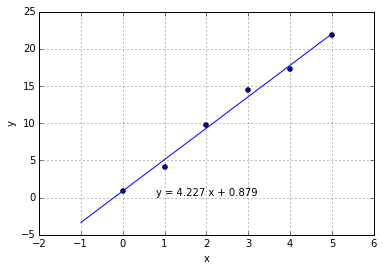

In [14]:
x = np.arange(-1, 6)
y = a * x + b
MeasurementDF.plot(kind='scatter', x='x', y='y')
pl.plot(x, y)
pl.text(2, 0, 'y = {0} x + {1}'.format(a,b), ha = 'center', va = 'bottom')

## 4.7.3 2変数が共に誤差を持つ線形近似
$$ \sigma_i \rightarrow \sigma^2_y + \left( \frac{d f}{d x} \right)^2 \sigma_x^2 $$
のようにして置き換えると、導いた式を用いて線形近似を行うことができる。

## 4.7.4 非線形近似
非線形近似の方法として歴史的に各種考案されてきた。ただし全ての関数に適した近似方法はないため、関数ごとに調べる必要がある。

非線形近似では数値的解析が必要となる。これは2つに大別される。

###** grid methods (格子線法) **
格子状に区切った代表点を複数取り、その中で最小値を計算する方法。

####*メリット*

1. 関数を等間隔に区切って代表点の評価と実装が簡単。

####*デメリット*

1. 多変数関数で計算量が爆発する。

1. 適用する範囲が有限領域でなければいけない。

####仲間
simplex methodという仲間がいる。

n次元上にn+1点を取った領域を作る。
そのn+1点から最大のものを取り除き、残りのn点の位置情報から最大点の位置を新しく取り直すという方法。

大域的な最小値を取ることができる。


###** gradient methods (勾配法) **
関数の傾き(1次の偏微分)を用いて、関数の最小値を求める方法。
偏微分の利用の仕方として、**最急降下法** や **ニュートン法** がその代表としてあげられる。

ここではニュートン法について説明する。
F(x)の最小値を探索する。

F(x)を$x_0$の周りに展開する。

$$ F(x) \simeq F(x_0) + \left. \frac{\partial F}{\partial x} \right|_{x_0} (x - x_0) $$

これは多変数関数で次のように書くことができる。

$$ \bf{F(x) \simeq F(x_0) + g^{T} (x - x_0) + \frac{1}{2}(x - x_0)^{T} G (x - x_0) } $$

ここで$g_i = \partial F/\partial x_i$, $G_{ij} = \partial^2 F/\partial x_i \partial x_j$である。
このとき、右辺が最小となるのは、

ヘッセ行列が正定値でかつ対称行列であることから、

$$ \bf{x_{min} = x_0 - G^{-1}g} $$
と導くことができる。
このようにして得た$\bf{x_{min}}$に対して、同様にテイラー展開から更なる最小値解の探索を続けていく。

#### メリット
1. 2次の偏微分から計算することができるので、強力な計算力。

#### デメリット
1. Gが正定値でなければならない。またGを毎回計算する必要があり、時間がかかる。

解決策1: 負については正に転換する手法が開発されている。(quasi-Newton 法)

解決策2: 隣のヘッセ行列の計算から次のヘッセ行列の計算を"update"する手法も開発されている。

###ニュートン法を用いた最小二乗法の一般化
ニュートン法を用いた最小二乗法の一般化を行っておく。
Χスクエアを次のように書き換える。

$$ S = \sum_k s^2_k $$
ここで、
$$ s_k = \frac{y_k - f(x_k)}{\sigma_k} $$
である。ヘッセ行列は、二次の項を落とした近似のもとで、
$$ G_{ij} = \frac{\partial^2 S}{\partial x_i \partial x_j} = 2 \sum_k \left( \frac{\partial s_k}{\partial x_i} \frac{\partial s_k}{\partial x_j} + s_k \frac{\partial^2 s_k}{\partial x_i \partial x_j}\right) \simeq  2 \sum_k \frac{\partial s_k}{\partial x_i} \frac{\partial s_k}{\partial x_j}$$
と導くことができる。

これらの強力なプログラムは、CERNの**Minuit**というライブラリに掲載されているとのこと。


###誤差の評価
一次のerror matrixを考えると、次のように分散を立式できる。

$$ \sigma^2 = \left| \frac{1}{2} \frac{\partial^2 S}{\partial \theta^2} \right|^{-1} $$

Sをテイラー展開すると、

$$ S(\theta) = S(\theta^*) + \frac{1}{2} \frac{\partial^2 S}{\partial \theta^2} (\theta - \theta^*)^2 = S(\theta^*) + \frac{1}{\sigma^2} (\theta - \theta^*)^2  $$

よって、

$$ S(\theta^* + \sigma) = S(\theta^*) + 1 $$
となる
S分布が1増加するところが標準偏差の誤差として、求めることができる。

# 4.8 少数の丸め方
誤差を2桁で丸め、それに合うように元の値も丸めるのが分かりやすい。

# ありがとうございました。